In [1]:

import pandas as pd
import seaborn as sn
import numpy as np
import json

In [2]:
def makeTHATdf():
    df = pd.read_csv("tracks.csv")
    df = df.dropna()
    return df

In [3]:
def VettingPL():
    with open("vetting_playlist.json", 'r') as file:
        data = json.load(file)
    
    data.keys()
    floridaKeys = data.keys()
    
    songs = []
    
    for item in data.get("tracks", {}).get("items", []):
        track = item.get("track", None)
        if track:
            song_info = {
                "id": track.get("id"),
                "name": track.get("name"),
                "album": track.get("album", {}).get("name"),
                "artist": track.get("album", {}).get("artists", [{}])[0].get("name"),
                "release_date": track.get("album", {}).get("release_date"),
                "image_url": track.get("album", {}).get("images", [{}])[0].get("url")
            }
            songs.append(song_info)

    df2 = pd.DataFrame(songs)
    return df2

In [7]:
def Feature1(df):
    df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
    df["release_year"] = df["release_date"].dt.year
    return df
    miniDF = df[(df["release_year"] >= 2000) & (df["release_year"] <= 2020)]

In [9]:
#This is for feature 2, it will measure the instrumentalness of music(if it's just voice or instruments)
def Feature2(df):
    bins = [0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 
0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 
0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 
0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 
0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 
0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 
0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 
0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 
0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 
0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 
0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 
0.555, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 
0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 
0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.7, 
0.705, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735, 0.74, 0.745, 0.75, 
0.755, 0.76, 0.765, 0.77, 0.775, 0.78, 0.785, 0.79, 0.795, 0.8, 
0.805, 0.81, 0.815, 0.82, 0.825, 0.83, 0.835, 0.84, 0.845, 0.85, 
0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.895, 0.9, 
0.905, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.94, 0.945, 0.95, 
0.955, 0.96, 0.965, 0.97, 0.975, 0.98, 0.985, 0.99, 0.995, 1.0001] 
    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 
39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 
57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 
75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 
93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 
109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 
124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 
139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 
154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 
169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 
184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 
199, 200]
    df['instru_encode'] = pd.cut(df['instrumentalness'], bins=bins, labels=labels, right=False)
    return df

In [11]:
# Function for feature 3, 'energy' column will be used for 
def Feature3(energy):
    if 0 <= energy <= 0.4:
        return 1
    elif 0.41 <= energy <= 0.7:
        return 2
    else:
        return 3

#Use this line of code to call this function

#df['energy_encoded'] = df['energy'].apply(Feature3)

In [13]:
# Function for feature4, this will measure the speechiness, for the prefered type of music
# Encoding:
# 1 = 0 - 0.2
#
def Feature4(speechiness):
    if 0 <= speechiness <= 0.005:
        return 1
    elif 0.005 < speechiness <= 0.01:
        return 2
    elif 0.01 < speechiness <= 0.015:
        return 3
    elif 0.015 < speechiness <= 0.02:
        return 4
    elif 0.02 < speechiness <= 0.025:
        return 5
    elif 0.025 < speechiness <= 0.03:
        return 6
    elif 0.03 < speechiness <= 0.035:
        return 7
    elif 0.035 < speechiness <= 0.04:
        return 8
    elif 0.04 < speechiness <= 0.045:
        return 9
    elif 0.045 < speechiness <= 0.05:
        return 10
    elif 0.05 < speechiness <= 0.055:
        return 11
    elif 0.055 < speechiness <= 0.06:
        return 12
    elif 0.06 < speechiness <= 0.065:
        return 13
    elif 0.065 < speechiness <= 0.07:
        return 14
    elif 0.07 < speechiness <= 0.075:
        return 15
    elif 0.075 < speechiness <= 0.08:
        return 16
    elif 0.08 < speechiness <= 0.085:
        return 17
    elif 0.085 < speechiness <= 0.09:
        return 18
    elif 0.09 < speechiness <= 0.095:
        return 19
    elif 0.095 < speechiness <= 0.10:
        return 20
    elif 0.10 < speechiness <= 0.105:
        return 21
    elif 0.105 < speechiness <= 0.11:
        return 22
    elif 0.11 < speechiness <= 0.115:
        return 23
    elif 0.115 < speechiness <= 0.12:
        return 24
    elif 0.12 < speechiness <= 0.125:
        return 25
    elif 0.125 < speechiness <= 0.13:
        return 26
    elif 0.13 < speechiness <= 0.135:
        return 27
    elif 0.135 < speechiness <= 0.14:
        return 28
    elif 0.14 < speechiness <= 0.145:
        return 29
    elif 0.145 < speechiness <= 0.15:
        return 30
    elif 0.15 < speechiness <= 0.155:
        return 31
    elif 0.155 < speechiness <= 0.16:
        return 32
    elif 0.16 < speechiness <= 0.165:
        return 33
    elif 0.165 < speechiness <= 0.17:
        return 34
    elif 0.17 < speechiness <= 0.175:
        return 35
    elif 0.175 < speechiness <= 0.18:
        return 36
    elif 0.18 < speechiness <= 0.185:
        return 37
    elif 0.185 < speechiness <= 0.19:
        return 38
    elif 0.19 < speechiness <= 0.195:
        return 39
    elif 0.195 < speechiness <= 0.20:
        return 40
    elif 0.20 < speechiness <= 0.205:
        return 41
    elif 0.205 < speechiness <= 0.21:
        return 42
    elif 0.21 < speechiness <= 0.215:
        return 43
    elif 0.215 < speechiness <= 0.22:
        return 44
    elif 0.22 < speechiness <= 0.225:
        return 45
    elif 0.225 < speechiness <= 0.23:
        return 46
    elif 0.23 < speechiness <= 0.235:
        return 47
    elif 0.235 < speechiness <= 0.24:
        return 48
    elif 0.24 < speechiness <= 0.245:
        return 49
    elif 0.245 < speechiness <= 0.25:
        return 50
    elif 0.25 < speechiness <= 0.255:
        return 51
    elif 0.255 < speechiness <= 0.26:
        return 52
    elif 0.26 < speechiness <= 0.265:
        return 53
    elif 0.265 < speechiness <= 0.27:
        return 54
    elif 0.27 < speechiness <= 0.275:
        return 55
    elif 0.275 < speechiness <= 0.28:
        return 56
    elif 0.28 < speechiness <= 0.285:
        return 57
    elif 0.285 < speechiness <= 0.29:
        return 58
    elif 0.29 < speechiness <= 0.295:
        return 59
    elif 0.295 < speechiness <= 0.30:
        return 60
    elif 0.30 < speechiness <= 0.305:
        return 61
    elif 0.305 < speechiness <= 0.31:
        return 62
    elif 0.31 < speechiness <= 0.315:
        return 63
    elif 0.315 < speechiness <= 0.32:
        return 64
    elif 0.32 < speechiness <= 0.325:
        return 65
    elif 0.325 < speechiness <= 0.33:
        return 66
    elif 0.33 < speechiness <= 0.335:
        return 67
    elif 0.335 < speechiness <= 0.34:
        return 68
    elif 0.34 < speechiness <= 0.345:
        return 69
    elif 0.345 < speechiness <= 0.35:
        return 70
    elif 0.35 < speechiness <= 0.355:
        return 71
    elif 0.355 < speechiness <= 0.36:
        return 72
    elif 0.36 < speechiness <= 0.365:
        return 73
    elif 0.365 < speechiness <= 0.37:
        return 74
    elif 0.37 < speechiness <= 0.375:
        return 75
    elif 0.375 < speechiness <= 0.38:
        return 76
    elif 0.38 < speechiness <= 0.385:
        return 77
    elif 0.385 < speechiness <= 0.39:
        return 78
    elif 0.39 < speechiness <= 0.395:
        return 79
    elif 0.395 < speechiness <= 0.40:
        return 80
    # Continue this pattern until you reach 1 or another specified value
    else:
        return 200  # Default case when speechiness is above 0.40
#Same here, use this line of code
#df['speechy_enco'] = df['speechiness'].apply(Feature4)
    
    #elif 0.21 <= speechiness <= 

In [15]:
df = makeTHATdf()
df2 = VettingPL()

In [16]:
df = Feature1(df) #This is release year(works fine)

In [17]:

df = Feature2(df) #This is the intru_enco(works fine), might want to work on the NA values, also, change the type

In [18]:
df['energy_encoded'] = df['energy'].apply(Feature3)
df['speechy_enco'] = df['speechiness'].apply(Feature4)

In [19]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586601 entries, 0 to 586671
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586601 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586601 non-null  int64         
 3   duration_ms       586601 non-null  int64         
 4   explicit          586601 non-null  int64         
 5   artists           586601 non-null  object        
 6   id_artists        586601 non-null  object        
 7   release_date      448010 non-null  datetime64[ns]
 8   danceability      586601 non-null  float64       
 9   energy            586601 non-null  float64       
 10  key               586601 non-null  int64         
 11  loudness          586601 non-null  float64       
 12  mode              586601 non-null  int64         
 13  speechiness       586601 non-null  float64       
 14  acousticn

In [20]:

df2["release_date"] = pd.to_datetime(df2["release_date"], errors="coerce")

In [21]:

#df3 = pd.merge(df, df2, on=['name', 'release_date'], how='left')
df3 = pd.merge(df2, df, on=['name', 'release_date'], how='inner')

In [22]:

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_x              41 non-null     object        
 1   name              41 non-null     object        
 2   album             41 non-null     object        
 3   artist            41 non-null     object        
 4   release_date      40 non-null     datetime64[ns]
 5   image_url         41 non-null     object        
 6   id_y              41 non-null     object        
 7   popularity        41 non-null     int64         
 8   duration_ms       41 non-null     int64         
 9   explicit          41 non-null     int64         
 10  artists           41 non-null     object        
 11  id_artists        41 non-null     object        
 12  danceability      41 non-null     float64       
 13  energy            41 non-null     float64       
 14  key               41 non-nul

In [23]:

df3[df3["release_year"].isna()]
#df[(df['instru_encode'] == 5) & (df['instrumentalness'] == 1)]

,id_x,name,album,artist,release_date,image_url,id_y,popularity,duration_ms,explicit,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,instru_encode,energy_encoded,speechy_enco
34,6DU1WKdUnR7OZkw7BZl9P0,Funeralopolis,Dopethrone,Electric Wizard,NaT,https://i.scdn.co/image/ab67616d0000b273d11797...,6rQG8QH1rGoCOeGHdrnYhb,48,523333,0,...,0.000014,0.89,0.113,0.297,125.152,4,NaN,179,2,10


In [24]:
# This was us manually assigning the actual date for Funeralopolis,  because it didn't have a date and didn't feel like dropping
# that single row buahahaha! Plus, it was the only NaN for the df3
df3.loc[34, 'release_year'] = 2000
df3.loc[34, 'release_date'] = pd.to_datetime('2000-10-10')

In [25]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [26]:
X = df3[['instru_encode', 'speechy_enco']]

In [27]:
model = DBSCAN(eps=5, min_samples=2).fit(X)
model.labels_
df3['labels'] = model.labels_

In [31]:
df3['labels'].unique()

array([ 0,  1, -1,  2,  3], dtype=int64)

In [32]:
df3.head(41)

,id_x,name,album,artist,release_date,image_url,id_y,popularity,duration_ms,explicit,...,instrumentalness,liveness,valence,tempo,time_signature,release_year,instru_encode,energy_encoded,speechy_enco,labels
0,0NSEZeWHkYCknk1nAVO1Fh,Better Than,Bad Self Portraits,Lake Street Dive,2014-02-18,https://i.scdn.co/image/ab67616d0000b273c48375...,0MH2fBfdoOl17OSbmrwClC,62,215880,0,...,0.013400,0.0970,0.406,77.576,4,2014.0,3,1,8,0
1,1DrlLvlYd1FIjNavRm6NdX,Back Pocket,Thrill of the Arts,Vulfpeck,2015-10-09,https://i.scdn.co/image/ab67616d0000b273d4d231...,1DrlLvlYd1FIjNavRm6NdX,64,181260,0,...,0.002810,0.0435,0.890,89.821,4,2015.0,1,2,31,1
2,40WXqoyOLAAugGmJWZU1FY,All The Time,Bahamas is Afie,Bahamas,2014-08-19,https://i.scdn.co/image/ab67616d0000b273f7db38...,0qI1W6chJgvrSAzAkX9JBa,68,234973,0,...,0.003730,0.0846,0.507,127.274,4,2014.0,1,2,10,0
3,0iTpQYzJnYgh7kIxyq8A2O,Two Weeks,Veckatimest,Grizzly Bear,2009-05-24,https://i.scdn.co/image/ab67616d0000b273f5819f...,0iTpQYzJnYgh7kIxyq8A2O,70,243160,0,...,0.005680,0.0800,0.704,159.871,4,2009.0,2,3,6,0
4,0qHrE21zGV4DThyfx0HdFu,Nancy From Now On,Fear Fun,Father John Misty,2012-05-01,https://i.scdn.co/image/ab67616d0000b2734cc30e...,77RNVzAVwqWiZrZuWqMV2i,61,234160,0,...,0.042800,0.0904,0.505,107.081,4,2012.0,9,2,6,-1
5,47KDDZgFiX1w6RFOuLXsSn,Tomorrow,Tomorrow,Shakey Graves,2016-09-02,https://i.scdn.co/image/ab67616d0000b273d9e969...,47KDDZgFiX1w6RFOuLXsSn,69,240587,0,...,0.000003,0.2080,0.423,98.075,3,2016.0,1,1,7,0
6,0MOMLuhHqNgJ7uAceOPmfj,All I've Ever Known,Bahamas is Afie,Bahamas,2014-08-19,https://i.scdn.co/image/ab67616d0000b273f7db38...,7I8ftQPSknxqIH8jiuh6iv,57,375973,0,...,0.247000,0.1080,0.254,126.050,4,2014.0,50,1,7,2
7,0UV5zxRMz6AO4ZwUOZNIKI,Where'd All the Time Go?,"Shame, Shame (Deluxe Edition)",Dr. Dog,2010-11-02,https://i.scdn.co/image/ab67616d0000b273047806...,0UV5zxRMz6AO4ZwUOZNIKI,71,234800,0,...,0.000969,0.1150,0.575,166.303,4,2010.0,1,3,12,0
8,5HLes17mwCwKt81mi0Tk35,"Archie, Marry Me",Alvvays,Alvvays,2014-07-22,https://i.scdn.co/image/ab67616d0000b273ce93b2...,5HLes17mwCwKt81mi0Tk35,63,196560,0,...,0.434000,0.1420,0.205,117.314,4,2014.0,87,3,15,-1
9,53I7CviVHhNYEKth717RLG,Coins,Sunlit Youth,Local Natives,2016-09-09,https://i.scdn.co/image/ab67616d0000b2731b7b6f...,53I7CviVHhNYEKth717RLG,60,237693,0,...,0.000000,0.0523,0.607,138.045,4,2016.0,1,2,8,0


In [33]:
silhouette_score(X, model.fit_predict(X))

0.4364774893843088

<Axes: xlabel='instru_encode', ylabel='speechy_enco'>

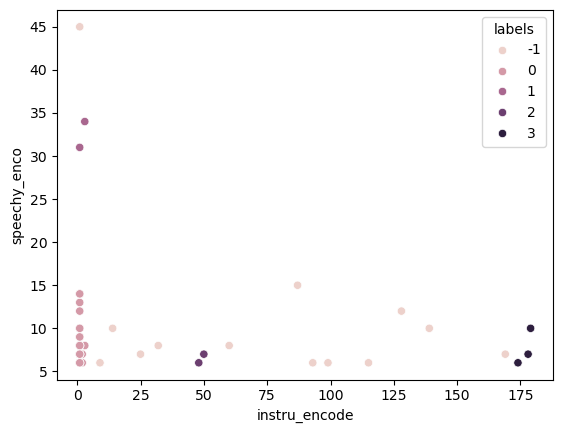

In [34]:
import seaborn as sns

sns.scatterplot(data=df3, x='instru_encode', y='speechy_enco', hue='labels')

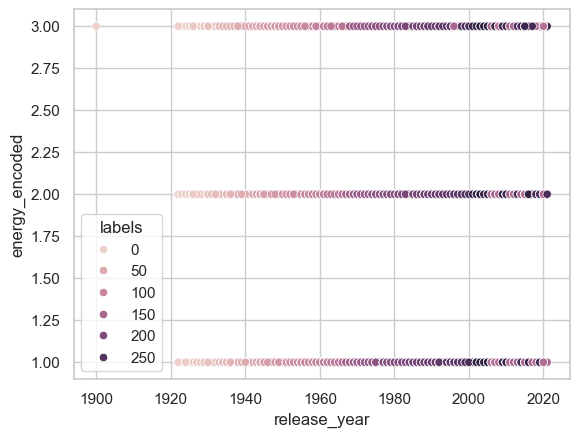

In [51]:
from sklearn.cluster import DBSCAN
import seaborn as sns

# Selecting the features for DBSCAN clustering
X = df[['release_year', 'energy_encoded']].copy()

# Handling missing values (Choose one)
X.dropna(inplace=True)  # Option 1: Remove rows with NaN
# X.fillna(X.mean(), inplace=True)  # Option 2: Fill NaN with column mean

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
labels = dbscan.fit_predict(X)

# Adding labels back to the original dataframe
df.loc[X.index, 'labels'] = labels  # Ensure alignment with dropped rows

# Plotting with Seaborn
sns.set(style="whitegrid")  # Optional: Set Seaborn style
scatter_plot = sns.scatterplot(data=df.loc[X.index], x="release_year", y="energy_encoded", hue="labels")
